In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [3]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [4]:
#shape
df.shape

(8128, 13)

In [5]:
# missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# total duplicates
df.duplicated().sum()

1202

In [8]:
# describe function
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# observation
- 1. Missing values in some cols
- 2. Seats is float shold be int
- 3. More than 1000 rows are duplicates
- 4. Outliers in year and selling price and seats
- 5. Torque, engine, mileage and max power have unnecessary units

# 1. Missing values in some cols

In [9]:
# drop any row with missing values
df.dropna(inplace=True)

In [10]:
df.shape

(7906, 13)

In [11]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

# 3. More than 1000 rows are duplicates

In [12]:
# Remove duplicates rows
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(6717, 13)

In [14]:
df.duplicated().sum()

0

# 2. Seats is float shold be int

In [15]:
#change data type of seats column
df['seats'] = df['seats'].astype('int32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6717 non-null   object
 1   year           6717 non-null   int64 
 2   selling_price  6717 non-null   int64 
 3   km_driven      6717 non-null   int64 
 4   fuel           6717 non-null   object
 5   seller_type    6717 non-null   object
 6   transmission   6717 non-null   object
 7   owner          6717 non-null   object
 8   mileage        6717 non-null   object
 9   engine         6717 non-null   object
 10  max_power      6717 non-null   object
 11  torque         6717 non-null   object
 12  seats          6717 non-null   int32 
dtypes: int32(1), int64(3), object(9)
memory usage: 708.4+ KB


# 5. Torque, engine, mileage and max power have unnecessary units

In [17]:
# handling mileage column
df['mileage'] = df['mileage'].str.split(expand=True)[0]
df['mileage'] = df['mileage'].astype('float64')

In [18]:
# handling engine column
df['engine'] = df['engine'].str.split(expand=True)[0]
df['engine'] = df['engine'].astype('int32')

In [19]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5


In [20]:
# handling max power column
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [21]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5


In [22]:
# dropping torque col
df.drop(columns=['torque'],inplace=True)

In [23]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5


In [24]:
df['name'].unique().shape

(1982,)

In [25]:
# extracting brand from name
df['brand'] = df['name'].str.split(expand=True)[0]

In [26]:
df.drop(columns=['name'],inplace=True)
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Skoda


In [27]:
freq_bands = df['brand'].value_counts()[df['brand'].value_counts()>100].index.tolist()

In [28]:
df = df[df['brand'].isin(freq_bands)]

In [29]:
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74.0,5,Maruti
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78.0,5,Honda


In [30]:
df['fuel'].value_counts()

Diesel    3360
Petrol    2832
CNG         51
LPG         35
Name: fuel, dtype: int64

In [31]:
freq_fuel = ['Diesel','Petrol']
df = df[df['fuel'].isin(freq_fuel)]

In [32]:
df['fuel'].value_counts()

Diesel    3360
Petrol    2832
Name: fuel, dtype: int64

In [33]:
df['seller_type'].value_counts()

Individual          5607
Dealer               560
Trustmark Dealer      25
Name: seller_type, dtype: int64

In [34]:
df = df[df['seller_type'].isin(['Individual','Dealer'])]

In [35]:
df = df[df['owner'].isin(['First Owner','Second Owner', 'Third Owner'])]

# 4. Outliers in year and selling price and seats

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='km_driven'>

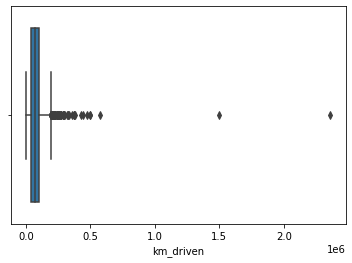

In [36]:
import seaborn as sns
sns.boxplot(df['km_driven'])

In [37]:
df.head(1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74.0,5,Maruti


In [38]:
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3-q1
max_val_km_driven = q3 + 1.5*iqr
min_val_km_driven = q1 - 1.5*iqr
print('max_val_km_driven = ',max_val_km_driven)
print('min_val_km_driven = ',min_val_km_driven)

max_val_km_driven =  193000.0
min_val_km_driven =  -55000.0


In [39]:
max_val_km_driven

193000.0

# caping km_driven outliers with max_val_km_driven

In [40]:
df['km_driven'] = np.where(df['km_driven']>max_val_km_driven,max_val_km_driven,df['km_driven'])

In [41]:
np.where(df['km_driven']>max_val_km_driven,max_val_km_driven,df['km_driven']).max()

193000.0

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year'>

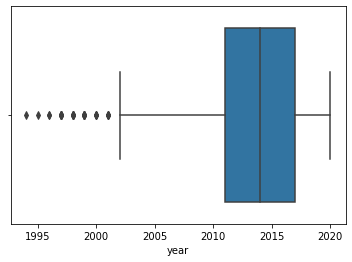

In [42]:
sns.boxplot(df['year'])

In [43]:
df = df[df['year']>=2000]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage'>

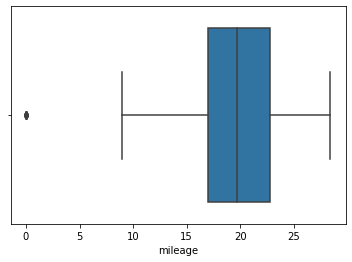

In [44]:
sns.boxplot(df['mileage'])

In [45]:
mean_mileage = df[df['mileage'] !=0]['mileage'].mean()

In [46]:
mean_mileage

19.654421950811443

In [47]:
df['mileage'] = np.where(df['mileage']==0,mean_mileage,df['mileage'])

In [48]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5988.000000,5.988000e+03,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000
mean,2013.765865,4.842851e+05,71445.704743,19.654422,1417.031730,85.574852,5.466099
std,3.645649,3.284374e+05,43335.299186,3.912071,482.498802,26.529119,1.002262
min,2000.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,2.000000
25%,2011.000000,2.500000e+05,38000.000000,17.000000,1197.000000,68.000000,5.000000
50%,2014.000000,4.250000e+05,68000.000000,19.700000,1248.000000,81.830000,5.000000
75%,2017.000000,6.300000e+05,100000.000000,22.740000,1498.000000,98.600000,5.000000
max,2020.000000,3.500000e+06,193000.000000,28.400000,3198.000000,218.000000,14.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='max_power'>

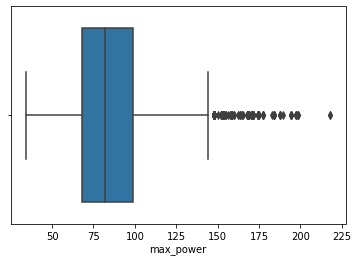

In [49]:
sns.boxplot(df['max_power'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='seats'>

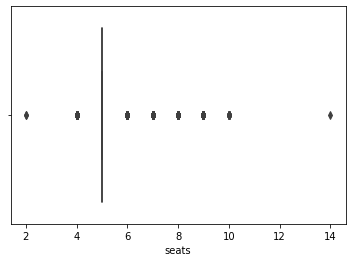

In [50]:
sns.boxplot(df['seats'])

In [51]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti
5,2017,440000,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,Hyundai


# train test split

In [52]:
x = df.drop(columns=['selling_price'])
y = df['selling_price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=2)

# ordinal encoding on owner column

In [53]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.4,1248,74.0,5,Maruti
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7,1497,78.0,5,Honda


In [55]:
tnf = ColumnTransformer(
    [
        ('ordinal',OrdinalEncoder(),['owner']),
        ('nominal',OneHotEncoder(drop='first',sparse=False),['fuel','seller_type','transmission','brand'])
    ], remainder='passthrough'
)

In [56]:
# x_train_tnf = tnf.fit_transform(x_train)
# x_test_tnf = tnf.transform(x_test)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [58]:
# lr.fit(x_train_tnf,y_train)

In [59]:
y_pred = lr.predict(x_test_tnf)

NameError: name 'x_test_tnf' is not defined

In [ ]:
from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [ ]:
# x_train_poly = poly.fit_transform(x_train_tnf)
# x_test_poly = poly.transform(x_test_tnf)

In [ ]:
lr = LinearRegression()
# lr.fit(x_train_poly,y_train)
# y_pred = lr.predict(x_test_poly)
# r2_score(y_test,y_pred)

# I gone a have to check in what value of random state we get best r2_score

In [ ]:
# scores = []
# for i in range(1000):
#     x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=i)
#     lr = LinearRegression()
#     lr.fit(x_train_poly,y_train)
#     y_pred = lr.predict(x_test_poly)
#     scores.append(r2_score(y_test,y_pred))

In [ ]:
# np.argmax(scores)

# I found this in value 2 I get maximum r2_score

In [ ]:
x_test_poly

In [ ]:
r2_score(y_test,y_pred)

# pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(
    [
        ('col-trasformer',tnf),
        ('poly',poly),
        ('lr',lr)
    ]
)

In [ ]:
pipe.fit(x_train,y_train)

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
df.columns